In [20]:
def func(i,m,year,month,day,tbefore,tafter):
    import pandas
    import datetime
    from datetime import timedelta
    import pandas_datareader.data as web
    import fix_yahoo_finance as yf
    import matplotlib.pyplot as plt
    import numpy as np
    import statsmodels.api as sm
    event_date = datetime.datetime(year,month,day)
    start_date = event_date - timedelta(days = tbefore)
    end_date = event_date + timedelta(days = tafter)
    df = web.DataReader([i, m],'yahoo', start_date,end_date)
    df = df['Close']
    rets = df.pct_change()
    %matplotlib inline
    plt.scatter(rets[i],rets[m])
    X = rets[i]    
    X = sm.add_constant(X)
    y = rets[m]
    model = sm.OLS(y,X,missing='drop')
    result = model.fit()
    print(result.summary())
    (a,b) = result.params
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(y)
    ax.plot(result.fittedvalues)
    rets['u'] = rets[i] - rets[m]*b - a
    rets['cumu'] = rets['u'].cumsum()
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(rets['cumu'])

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     30.61
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           0.000129
Time:                        15:26:04   Log-Likelihood:                 53.142
No. Observations:                  14   AIC:                            -102.3
Df Residuals:                      12   BIC:                            -101.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.435      0.6

/Users/amber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


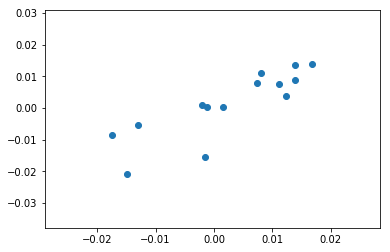

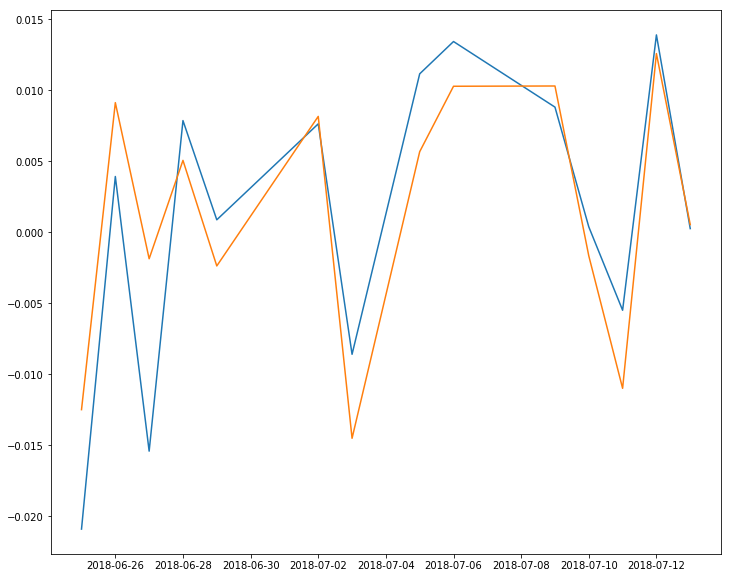

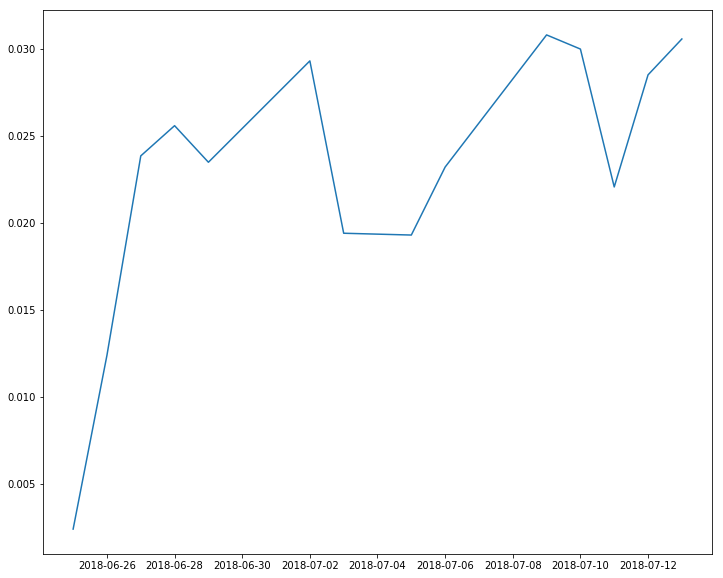

In [25]:
func('AAPL', '^IXIC',2018,7,2, 10, 10)

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     69.98
Date:                Thu, 15 Nov 2018   Prob (F-statistic):            0.00112
Time:                        15:34:28   Log-Likelihood:                 29.708
No. Observations:                   6   AIC:                            -55.42
Df Residuals:                       4   BIC:                            -55.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      3.382      0.0

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


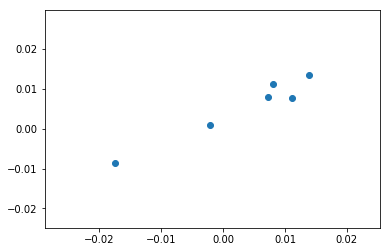

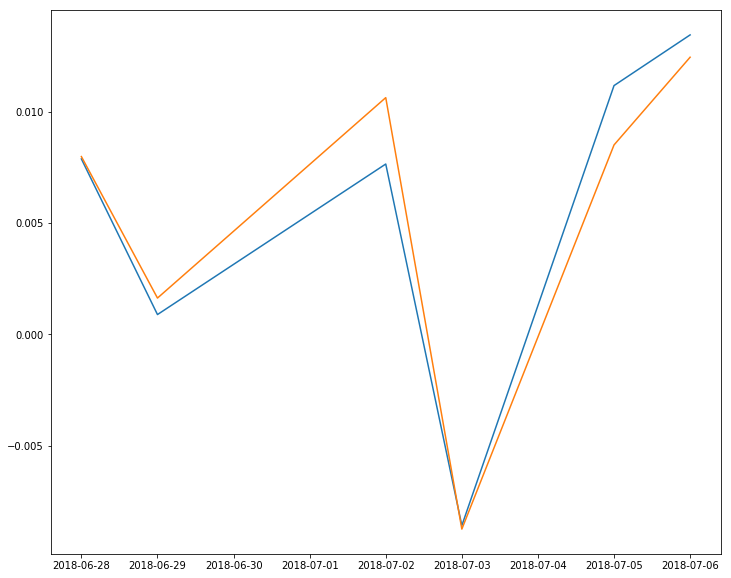

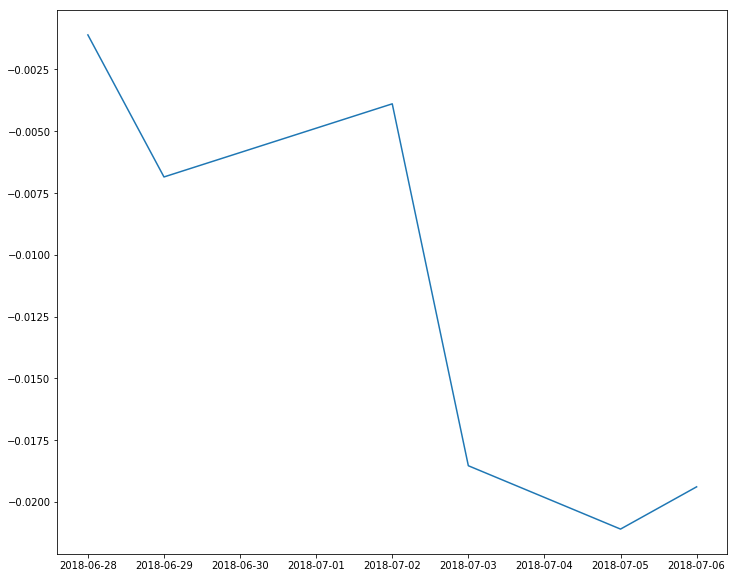

In [26]:
func('AAPL', '^IXIC',2018,7,2, 5, 5)

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     22.70
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           2.50e-05
Time:                        15:34:59   Log-Likelihood:                 152.05
No. Observations:                  42   AIC:                            -300.1
Df Residuals:                      40   BIC:                            -296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.484e-05      0.001     -0.082      0.9

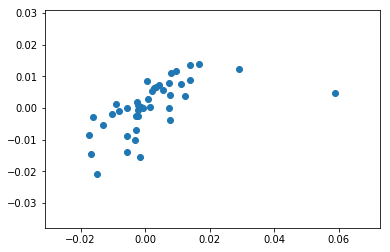

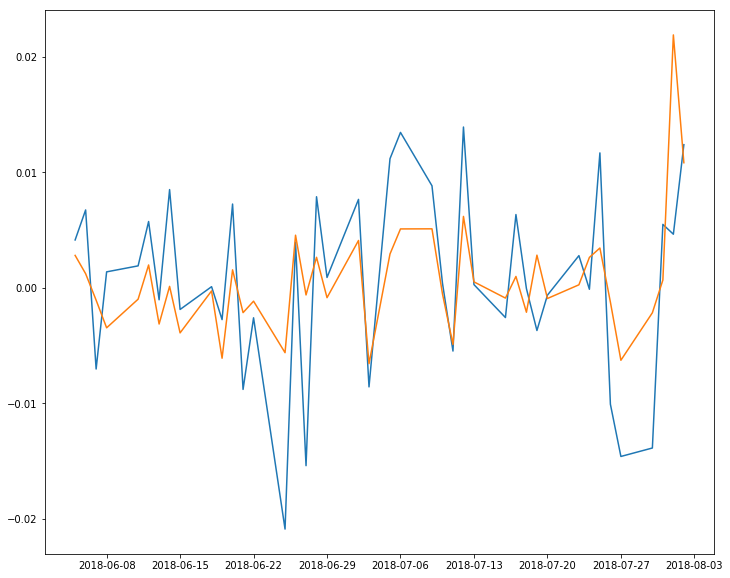

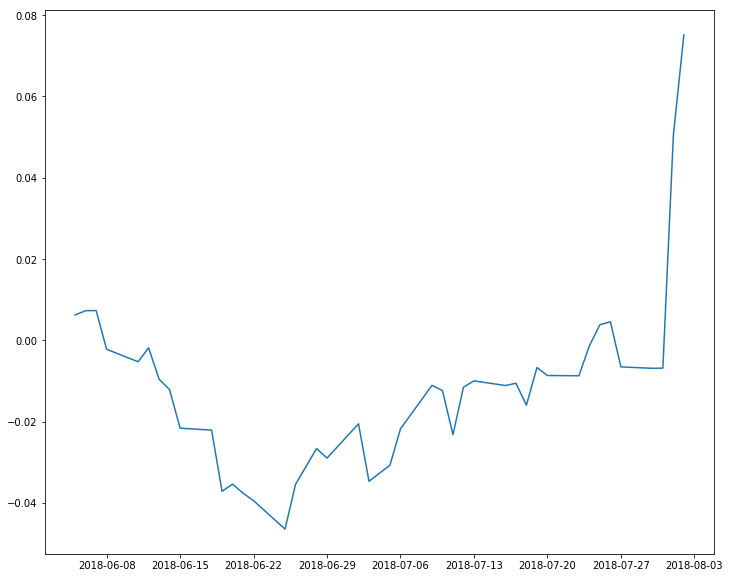

In [27]:
func('AAPL', '^IXIC',2018,7,2, 30, 30)